# Домашнее задание 6 - Шмаков Владимир Б04-105

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles, make_blobs
from sklearn import cluster
from matplotlib import cm
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, mean_squared_error
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as sts
from scipy import  optimize
from matplotlib.animation import  FuncAnimation


### Задача 1

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.


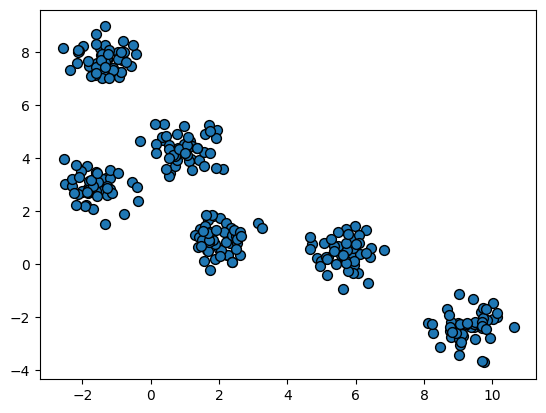

In [3]:
X, y = make_blobs(n_samples = 300, centers = 6, cluster_std = 0.5, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

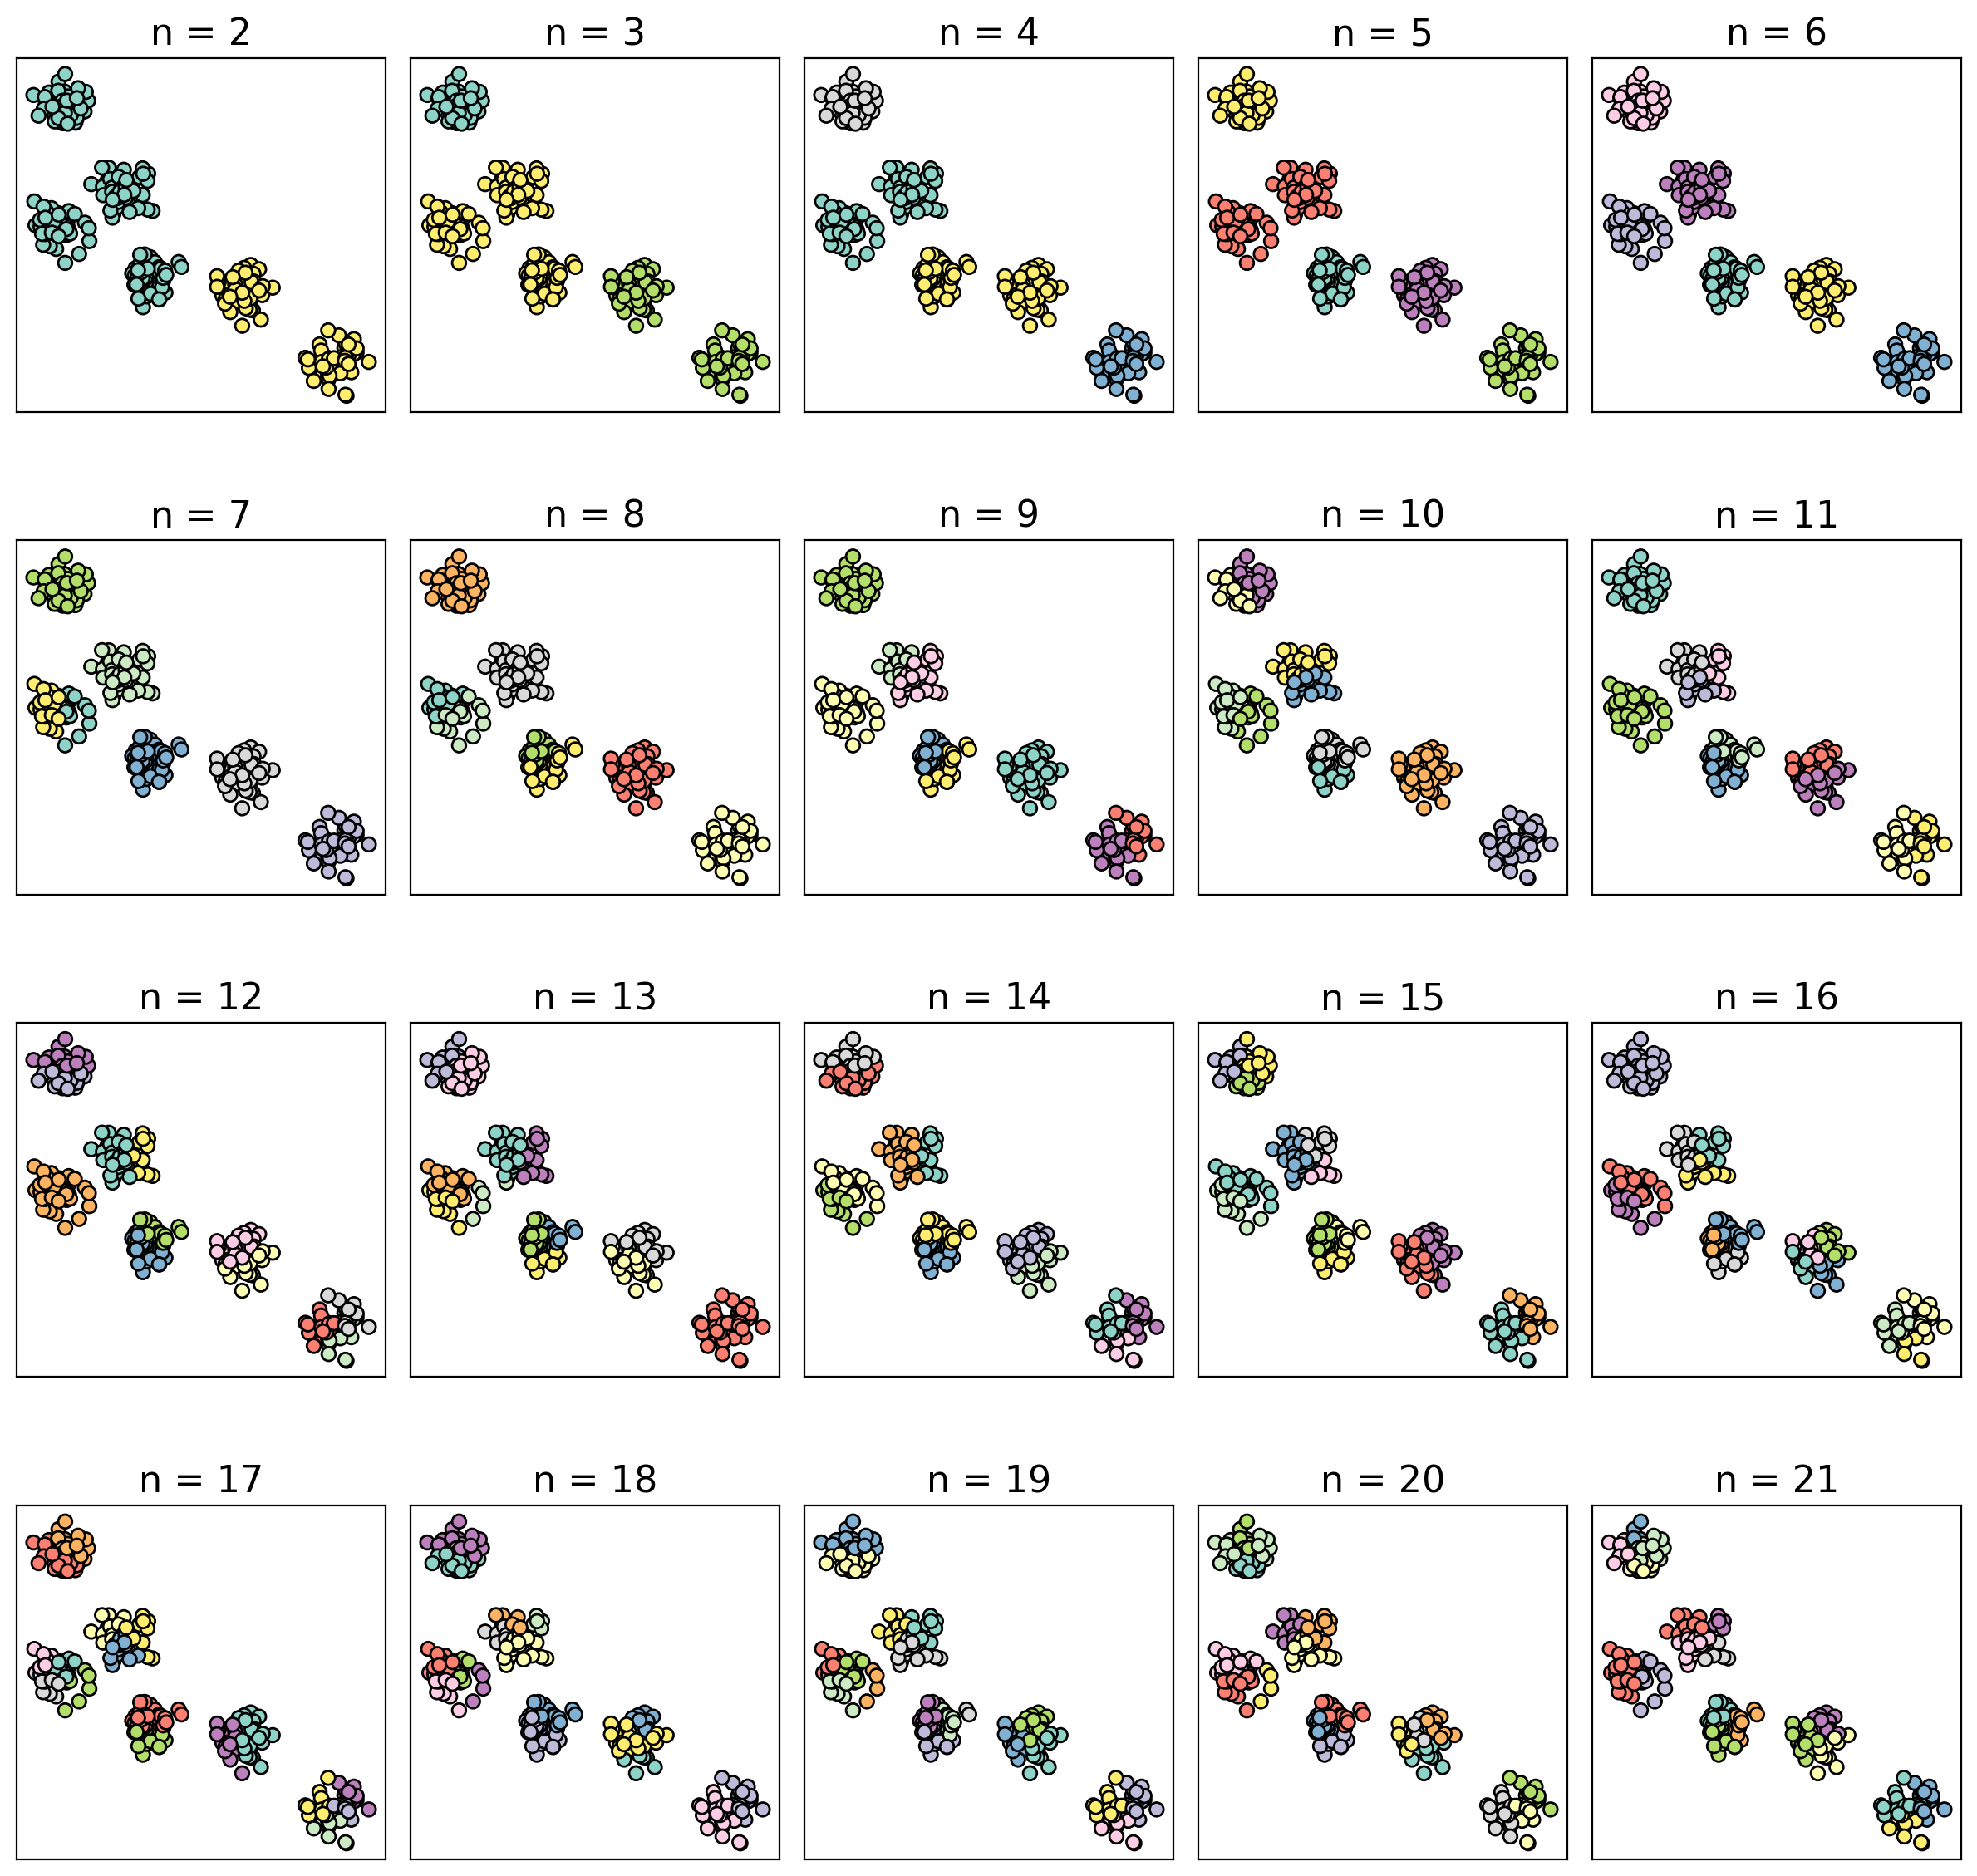

In [4]:
n_clusters_values = np.arange(20, dtype = np.int64) + 2
metric_names = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score']
metric_callable = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
metric_values = {n: [] for n in metric_names}
fig, ax = plt.subplots(4, len(n_clusters_values) // 4, figsize = (12, 12), dpi = 200)

for plotable, n in zip(ax.flatten(), n_clusters_values):
    k_means_model = cluster.KMeans(n_clusters = n, n_init = 'auto').fit(X)
    y_prediction = k_means_model.predict(X)
    plotable.scatter(X[:, 0], X[:, 1], c = y_prediction, edgecolor='k', cmap = 'Set3')
    plotable.set_title(f'n = {n}', fontsize = 16)
    plotable.set_xticks([])
    plotable.set_yticks([])
    plotable.set_aspect('equal')
    for name, metric in zip(metric_names, metric_callable):
        metric_values[name].append(metric(X, y_prediction))

fig.tight_layout()

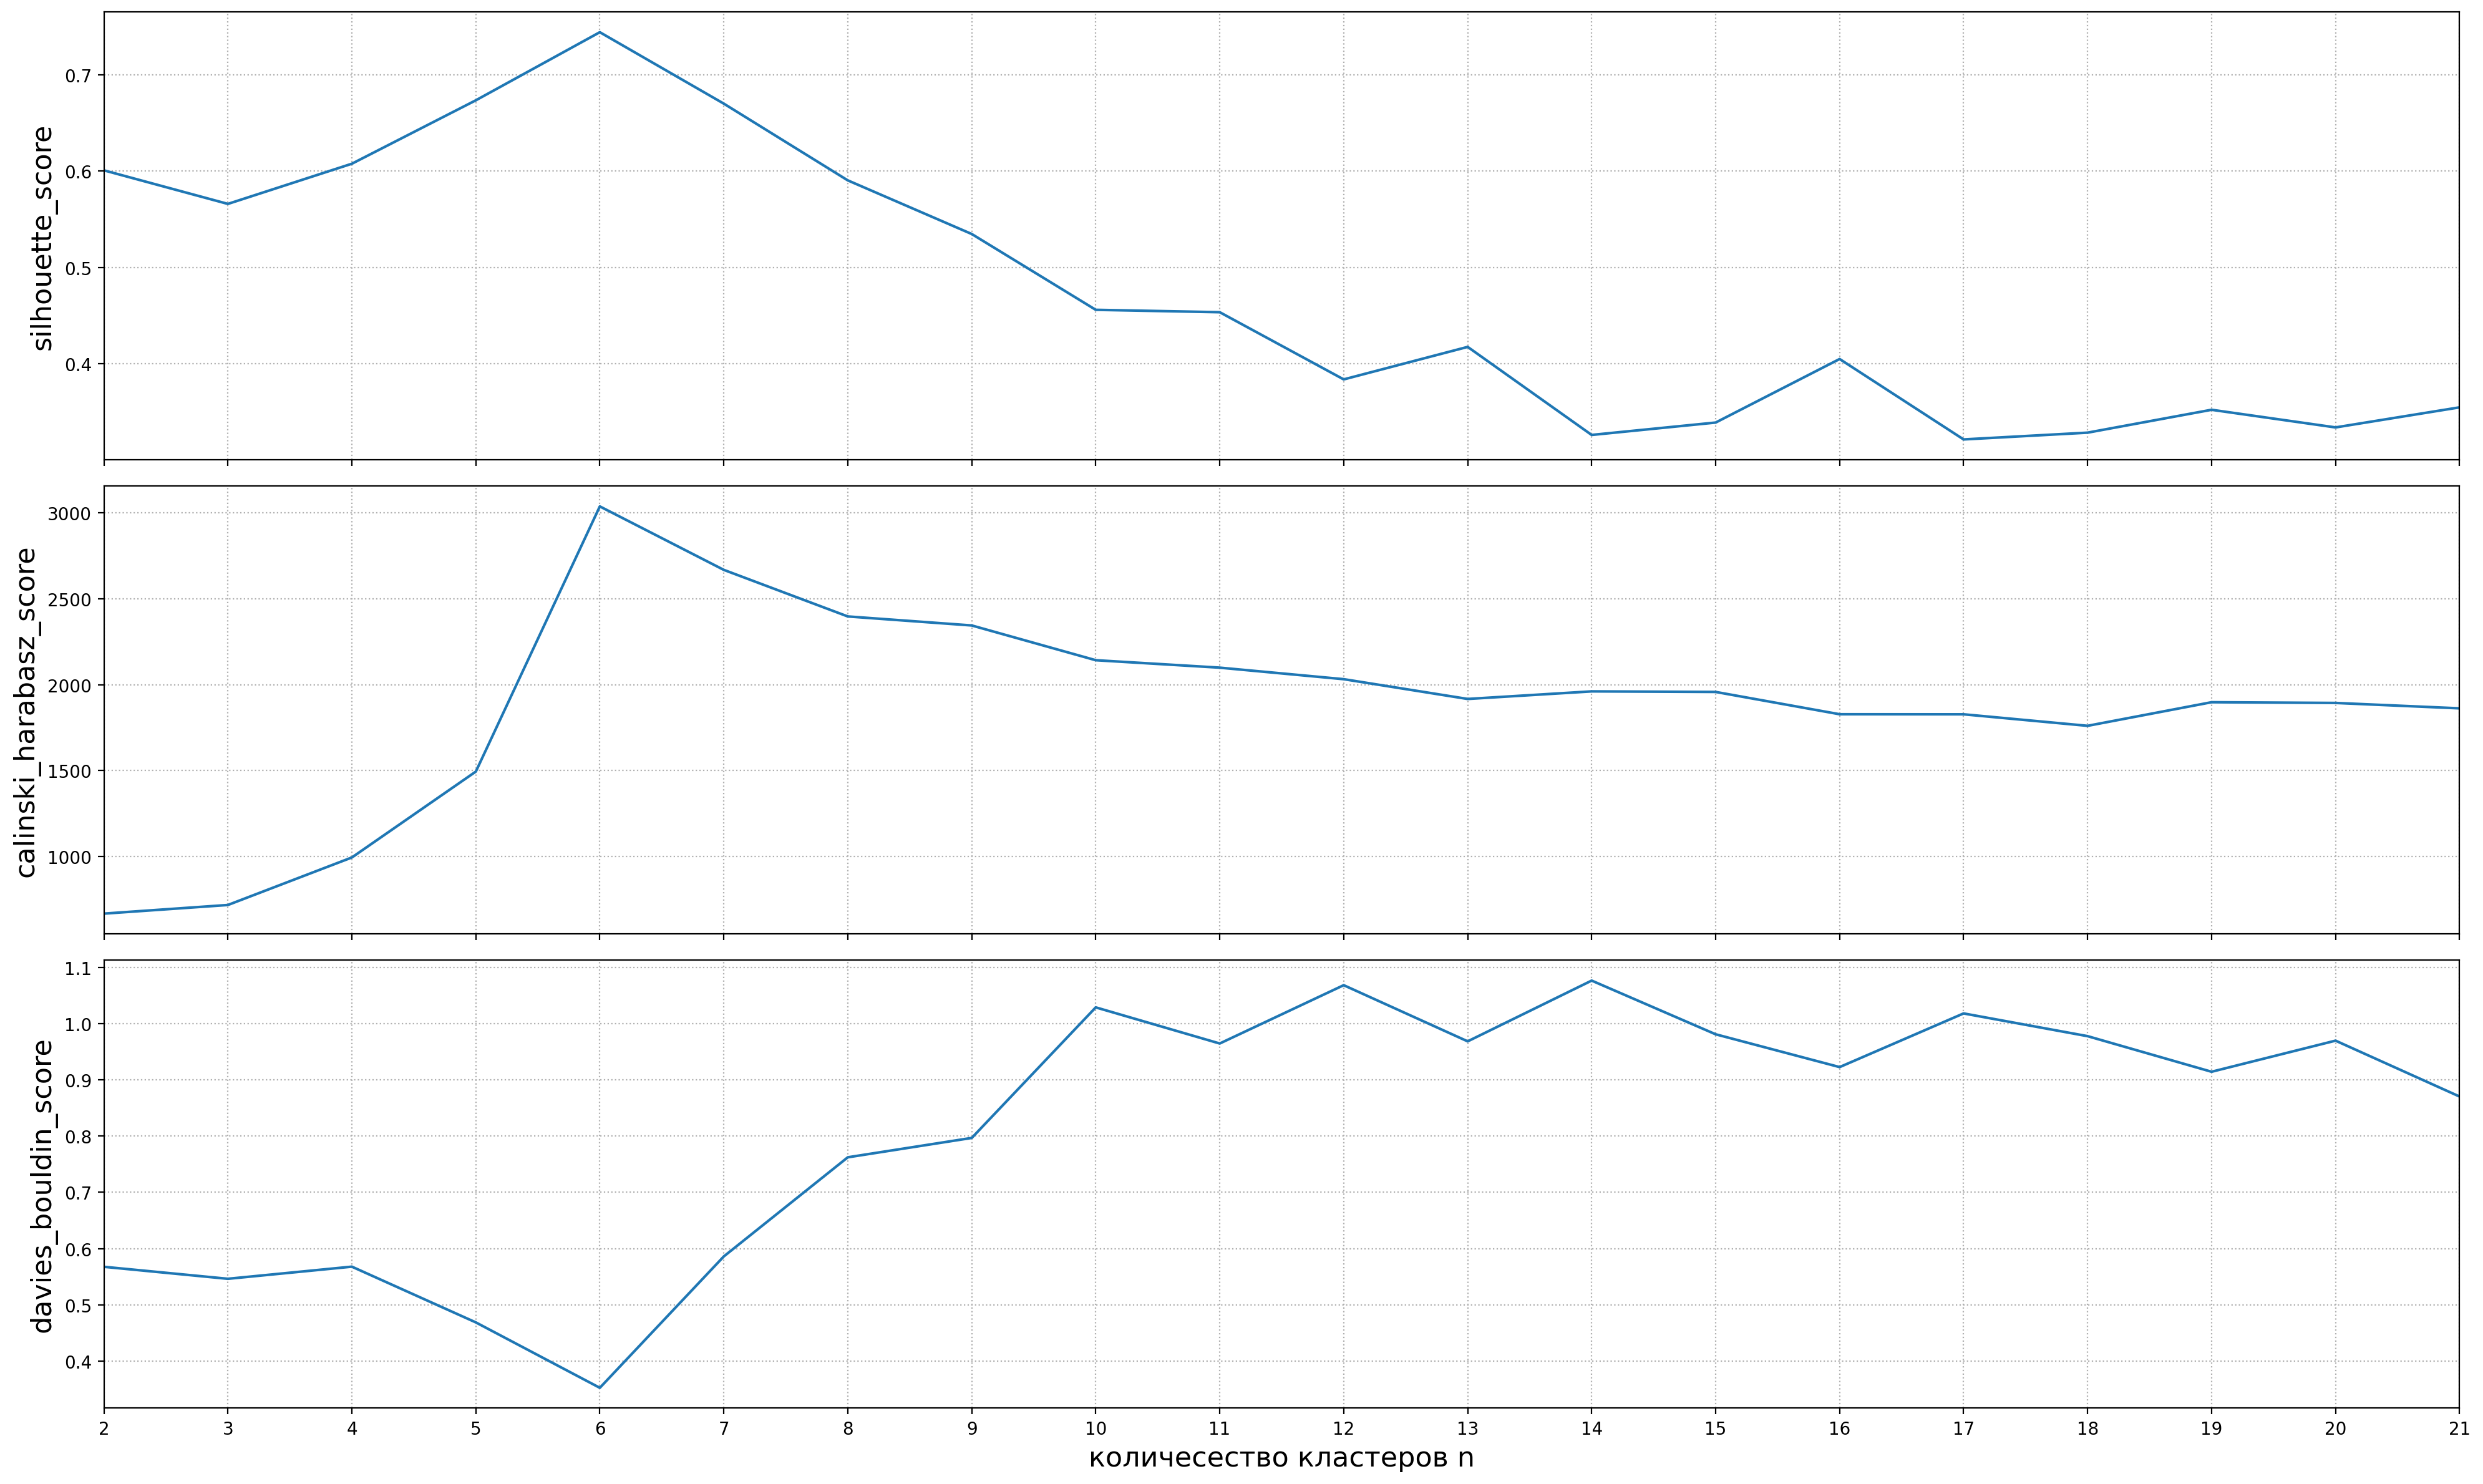

In [5]:
fig, ax = plt.subplots(len(metric_names), 1, figsize = (20, 12), dpi = 200, sharex = True)


for name, metric, plotable in zip(metric_names, metric_callable, ax):
        plotable.plot(n_clusters_values, metric_values[name], label = name)
        plotable.set_xticks(n_clusters_values)
        plotable.grid(ls = ':')
        plotable.set_ylabel(name, fontsize = 16)
        plotable.set_xlim(np.min(n_clusters_values), np.max(n_clusters_values))

ax[-1].set_xlabel("количесество кластеров n", fontsize = 16)

fig.tight_layout()

__Вывод__

Как видим, максимум метрик *silhoutte* и *calinski harabaz* достигается при $n = 6$. При $n = 6$ также достигается минимум метрики *davies bouldin*.

Согласно документации `sklearn` кластеризация считается наилучшей, если метрика *davies bouldin* минимальна. 

### Задача 2

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели. 

In [6]:
param_linkage = ["ward", "complete", "average", "single"]
metric_names = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score']
metric_callable = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
metric_values = {linkage: {metr: [] for metr in metric_names} for linkage in param_linkage}

for linkage in param_linkage:
    for n in n_clusters_values:
        model = AgglomerativeClustering(n_clusters = n, linkage = linkage)
        y_prediction = model.fit_predict(X)
        for name, func in zip(metric_names, metric_callable):
            metric_values[linkage][name].append(func(X, y_prediction))

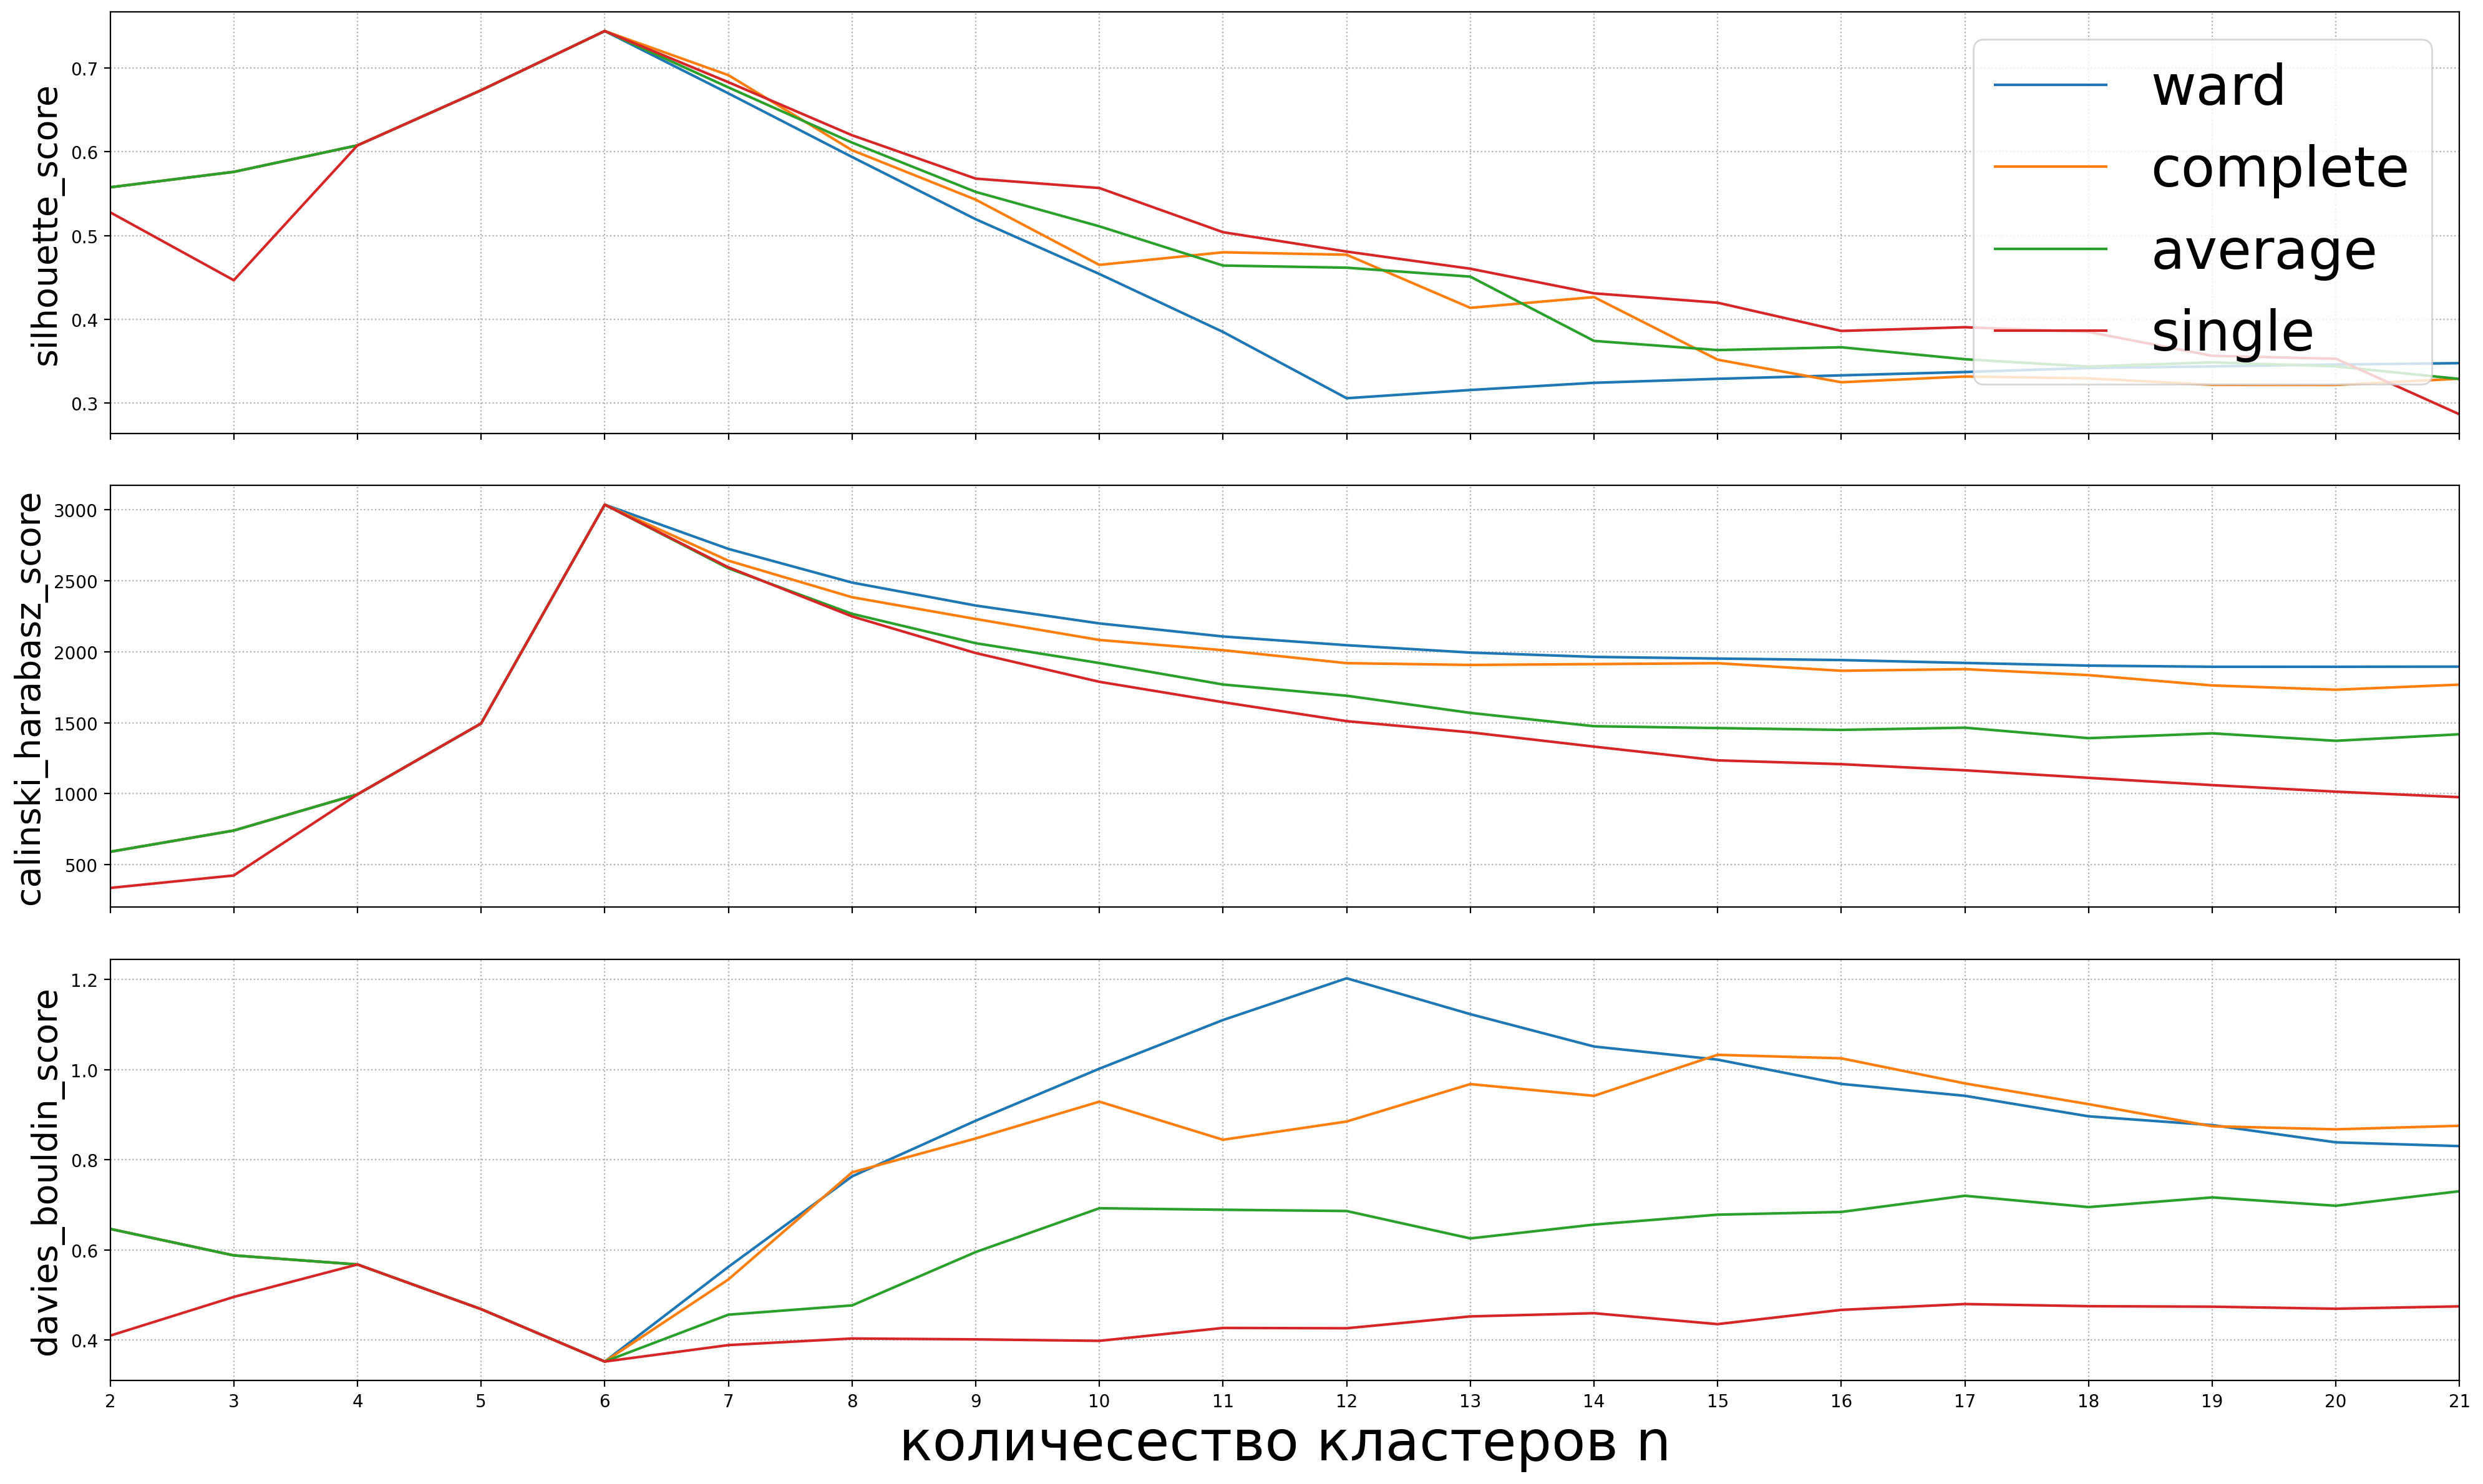

In [7]:
fig, ax = plt.subplots(len(metric_names), 1, figsize = (20, 12), dpi = 200, sharex = True)


for name, metric, plotable in zip(metric_names, metric_callable, ax):
    for linkage in param_linkage:
        plotable.plot(n_clusters_values, metric_values[linkage][name], label = linkage)
        plotable.set_xticks(n_clusters_values)
        plotable.grid(ls = ':')
        plotable.set_ylabel(name, fontsize = 20)
        plotable.set_xlim(np.min(n_clusters_values), np.max(n_clusters_values))
        

ax[-1].set_xlabel("количесество кластеров n", fontsize = 32)
ax[0].legend(fontsize = 32)
fig.tight_layout()

Как видим, все метрики достигают своих наилучших значений при параметрах `n = 6`. Предположу что модель `single`(красная кривая) является наилучшей. 

На рисунке выше видно, что красная кривая метрики `davies bouldin` лежит ниже остальных. Также красная кривая лежит заметно выше остальных при использовании метрики `sillhoutte`.

Посмотрим на кривые оценки качества моделей которые используют различные меры расстояния между точками

In [8]:
param_norm = ['jaccard', 'haversine', 'l2', 'canberra', 'dice', 'sokalsneath', 'hamming', 'russellrao', 'minkowski', 'chebyshev', 'kulsinski', 'correlation', 'l1', 'matching', 'cosine', 'manhattan', 'braycurtis', 'cityblock', 'sokalmichener', 'yule', 'euclidean', 'rogerstanimoto', 'sqeuclidean']
metric_names = ['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score']
metric_callable = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
metric_values = {norm: {metr: [] for metr in metric_names} for norm in param_norm}

for norm in param_norm:
    print(norm)
    for n in n_clusters_values:
        model = AgglomerativeClustering(n_clusters = n, linkage = 'single', metric = norm)
        y_prediction = model.fit_predict(X)
        for name, func in zip(metric_names, metric_callable):
            metric_values[norm][name].append(func(X, y_prediction))

jaccard


haversine
l2
canberra
dice
sokalsneath
hamming
russellrao
minkowski
chebyshev
kulsinski
correlation
l1
matching
cosine
manhattan
braycurtis
cityblock
sokalmichener
yule
euclidean
rogerstanimoto
sqeuclidean


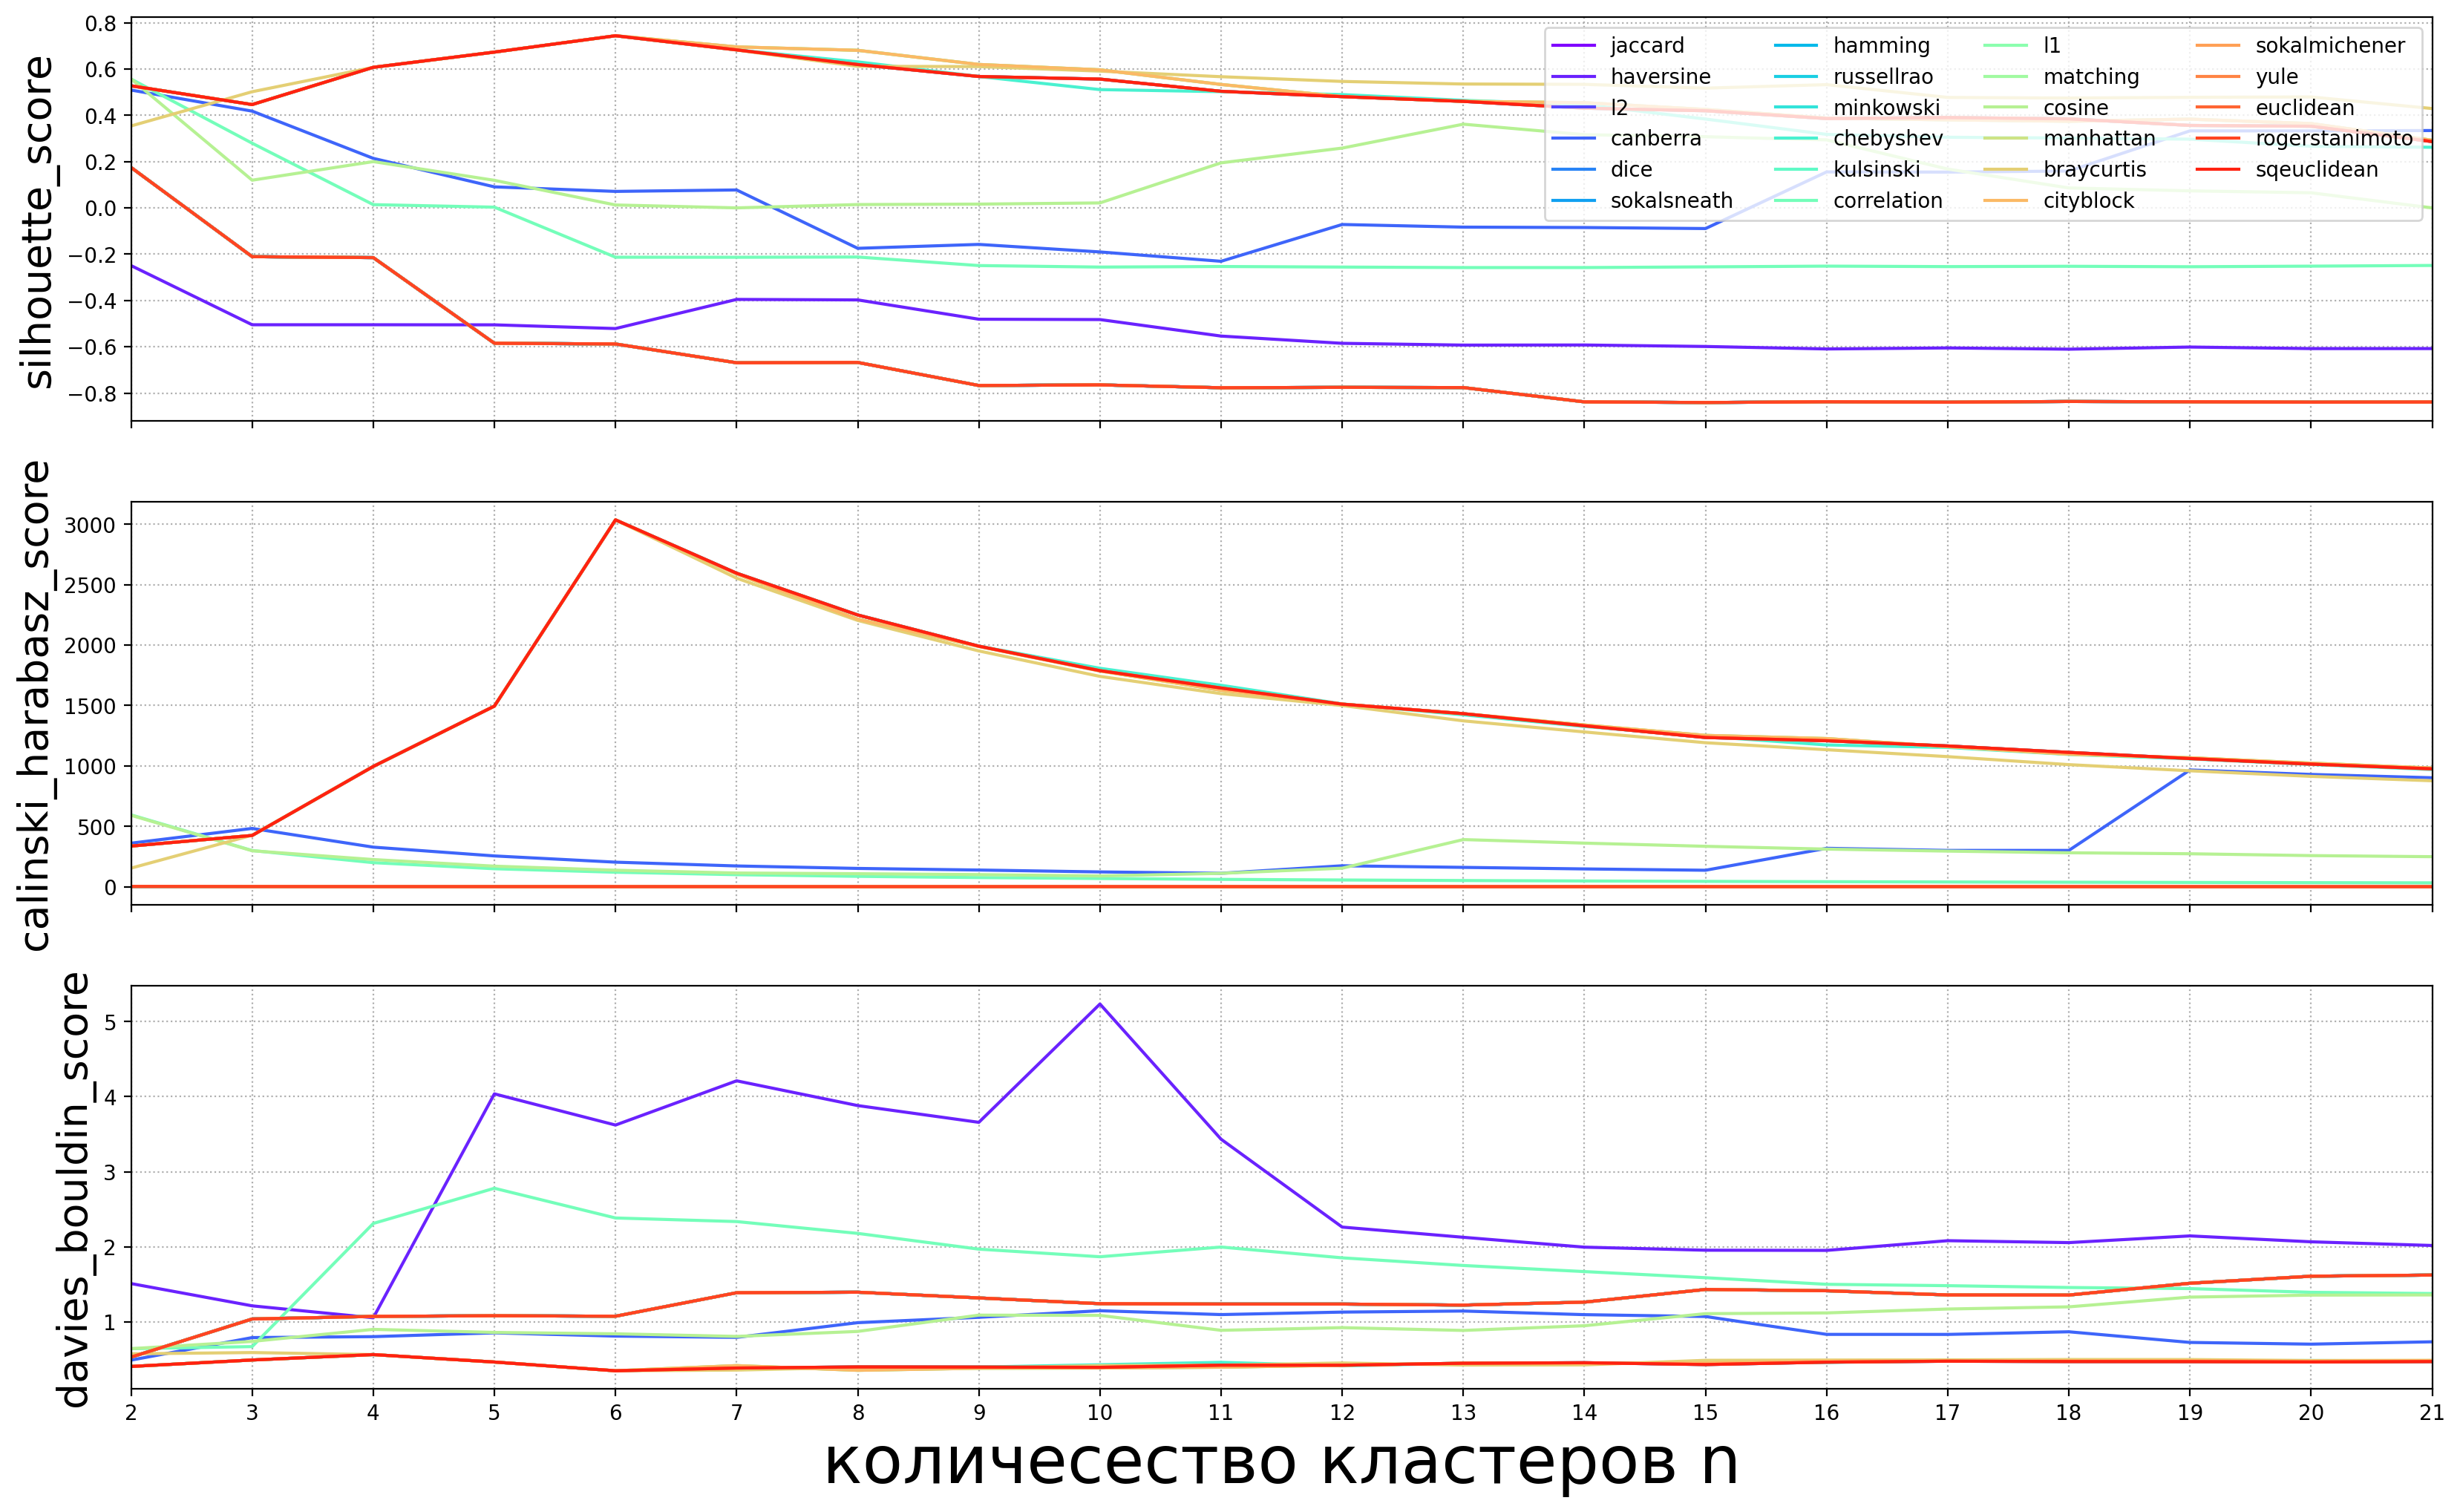

In [9]:
fig, ax = plt.subplots(len(metric_names), 1, figsize = (20, 12), dpi = 200, sharex = True)


for name, metric, plotable in zip(metric_names, metric_callable, ax):
    for ind, norm in enumerate(param_norm):
        plotable.plot(n_clusters_values, metric_values[norm][name], label = norm, color = cm.rainbow(ind / len(param_norm)))
        plotable.set_xticks(n_clusters_values)
        plotable.grid(ls = ':')
        plotable.set_ylabel(name, fontsize = 20)
        plotable.set_xlim(np.min(n_clusters_values), np.max(n_clusters_values))
        

ax[-1].set_xlabel("количесество кластеров n", fontsize = 32)
ax[0].legend(fontsize = 10, loc = 'upper right', ncol = 4);

Согласно графикам выше, норма `cosine` оказалась наихучшей. Остальные метрики ведут себя практически одинаково. И достигают наилучших значений при `n = 6`.

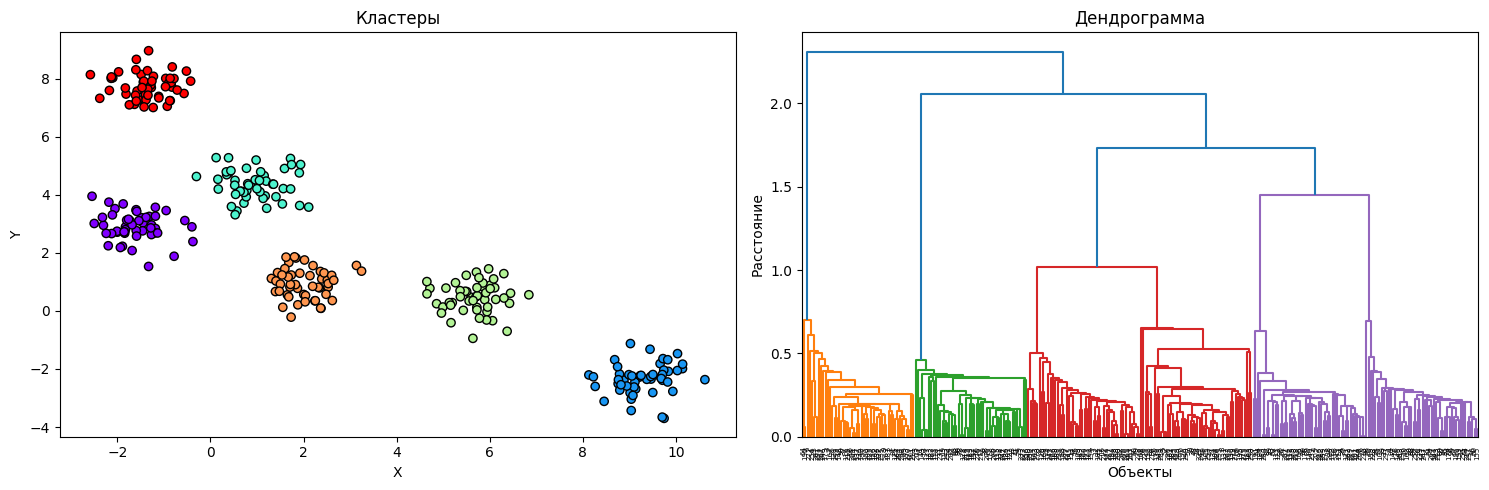

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

best_model = AgglomerativeClustering(n_clusters = 6,
                                    linkage = 'single',
                                     metric = 'manhattan') 
clusters = best_model.fit_predict(X)

# Ссылка
Z = linkage(X, method = 'single')

# Создание субплотов
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Левый субплот с кластерами
axs[0].scatter(X[:, 0], X[:, 1], c = clusters, cmap='rainbow', edgecolor='k')
axs[0].set_title('Кластеры')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Правый субплот с дендрограммой
dendrogram(Z, ax=axs[1])
axs[1].set_title('Дендрограмма')
axs[1].set_xlabel('Объекты')
axs[1].set_ylabel('Расстояние')

plt.tight_layout()
plt.show()

### Задача 3

### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) 

In [11]:
from sklearn.metrics import pairwise_distances

euclidian_matrix = pairwise_distances(X)
my_matrix = pairwise_distances(X)

### Задача 5

Пусть дана выборка точек $x_i$, взятая из смеси гауссовых распределений:

$$
p(x)=\alpha \cdot \mathcal{N}_{\mu_1, \sigma_1}(x)+(1-\alpha) \cdot \mathcal{N}_{\mu_2, \sigma_2}(x) .
$$

Тогда можно поставить задачу оценки параметров $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ по выборке $\left\{x_i\right\}$.
- Покажите, что задача максимизации обычного правдоподобия $\prod_i p\left(x_i\right) \longrightarrow \max _{\alpha, \mu_1, \mu_2}$ плохо определена. Какие значения параметров максимизируют такое правдоподобие?
- Сгенерируйте данные (просто два сгустка точек, хорошо видных при реализации) и найдите параметры $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ с помощью ЕМ-алгоритма. Инициализировать параметры можно какими-то случайными значениями.
ЕМ-алгоритм состоит из двух чередующихся шагов:
>1. M(Maximization)-шаг. Относим каждую точку $x_i$ к первой или второй гауссиане, сравнивая значения правдоподобия для каждой компоненты смеси:
>
>$$
a\left(x_i\right)= \begin{cases}1, & p_1\left(x_i\right)>p_2\left(x_i\right), \\ 2, & p_2\left(x_i\right)>p_1\left(x_i\right),\end{cases}
$$
>
>где $p_1(x)=\alpha \mathcal{N}_{\mu_1, \sigma_1}(x), \; \; p_2(x)=(1-\alpha) \mathcal{N}_{\mu_2, \sigma_2}(x)$.
>
>2. E( Expectation)-шаг. Находим параметры $\mu_1, \sigma_1$ и $\mu_2, \sigma_2$, максимизируя правдоподобие (или его логарифм) отдельно по точкам, отнесенным к каждой гауссиане:
>
>$$
\begin{gathered}
\prod_{x_i: a\left(x_i\right)=1} p_1\left(x_i\right) \longrightarrow \max _{\mu_1, \sigma_1} \\
\prod_{x_i: a\left(x_i\right)=2} p_2\left(x_i\right) \longrightarrow \max _{\mu_2, \sigma_2}
\end{gathered}
$$

__Примечание.__ При нахождении параметра $\alpha$ можно оптимизировать обычное правдоподобие $\prod_i p\left(x_i\right)$. Все такие максимизации правдоподобия осушествляются аналитически в общем виде для гауссовых распределений. 

__Реализуйте ЕМ-алгоритм.__ Так как метод является итерационным, необходимо выбрать какой-либо критерий остановки, например, прекращать процес, если относительное изменение каждого параметра при очередном шаге меньше некоторого порога. С какой точностью удалось восстановить $\alpha, \mu_1, \mu_2, \sigma_1, \sigma_2$ ?

In [12]:
class sum_of_two_gaussians:
    def __init__(self, alpha, sigma1, sigma2, mu1, mu2):
        self.alpha, self.sigma1, self.sigma2, self.mu1, self.mu2 = alpha, sigma1, sigma2, mu1, mu2 
    def pdf(self,x):
        return self.alpha * sts.norm(self.mu1, self.sigma1).pdf(x) + (1 - self.alpha) * sts.norm(self.mu2, self.sigma2).pdf(x)
    def rvs(self, size):
        elements = np.linspace(-100, 100, int(1e6))
        probabilities = self.pdf(elements) * np.abs(elements[0] - elements[1])
        return np.random.choice(elements, p = probabilities, size = size) + sts.uniform(0, np.abs(elements[0] - elements[1])).rvs(size)

In [35]:
distribution = sum_of_two_gaussians(0.3, 1, 0.9, 0.2, 3)
sample = distribution.rvs(100000)
print(sample.shape)

(100000,)


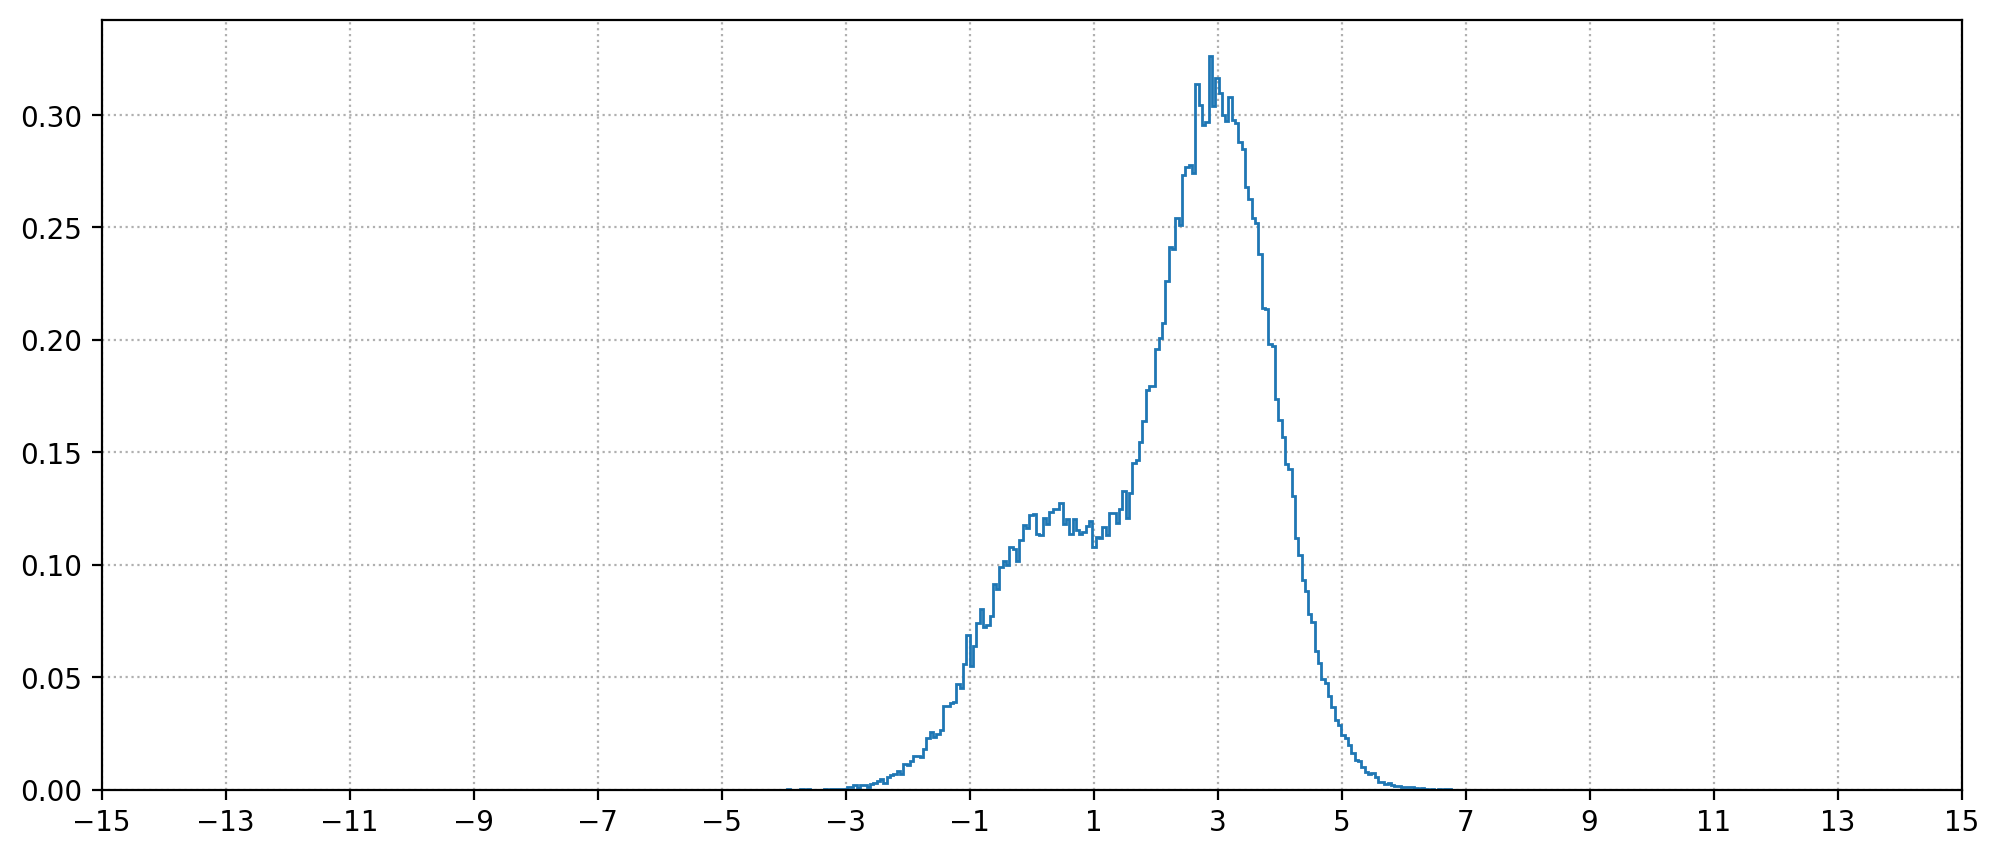

In [36]:
plt.figure(figsize= (12, 5), dpi = 200)
plt.grid(ls = ':')
plt.hist(sample, bins = 200, histtype = 'step', density = True)
plt.xlim(-15, 15)
plt.xticks(np.arange(-15, 17, 2));

In [42]:
alpha, param_1, param_2 = np.random.rand(), np.random.rand(2) * 5, np.random.rand(2) * 5
distribution_classes = []
iteration = 0
diff = 100
now_l = 10
history = {'classes': [], 'param_1': [], 'param_2': [], 'alpha': [], 'L': []}
history['L'].append(0)
while iteration < int(1e4) and (diff > 1e-3 or np.isnan(diff)):
    distribution_classes = alpha * sts.norm(*param_1).pdf(sample) >= (1 - alpha) * sts.norm(*param_2).pdf(sample) 
    sample1, sample2 = [sample[i] for i in range(len(sample)) if distribution_classes[i]], [sample[i] for i in range(len(sample)) if not distribution_classes[i]]
    param_1_prev, param_2_prev, alpha_prev = np.array(param_1), np.array(param_2), alpha
    try:
        param_1 = sts.norm.fit(sample1)
        param_2 = sts.norm.fit(sample2)
    except:
        param_1 = np.random.random(2)
        alpha = np.random.random()
        param_2 = np.random.random(2)
    log_L = lambda a: 1e5 / np.sum(np.log(np.abs(sum_of_two_gaussians(a, param_1[1], param_2[1], param_1[0], param_2[0]).pdf(sample))))
    alpha = optimize.minimize(log_L, np.random.rand(), method = 'CG').x[0]
    while np.isnan(alpha):
        alpha = optimize.minimize(log_L, -np.random.rand() * alpha / 2 + alpha , method = 'BFGS', bounds=(0.05, 0.94)).x[0]
    diff = np.abs(np.linalg.norm(np.hstack([param_1_prev - np.array(param_1), param_2_prev - np.array(param_2), [alpha - alpha_prev]])))
    now_l = np.abs(log_L(alpha))
    if not np.isnan(diff): print(diff, now_l)
    history['param_1'].append(param_1)
    history['param_2'].append(param_2)
    history['alpha'].append(alpha)
    history['classes'].append(distribution_classes)
    iteration += 1
    history['L'].append(now_l)

3.08528634464863 0.550649204248393
0.05369964571665602 0.5512368992458483
0.04740818181835482 0.5517022402744737
0.04014981167185894 0.5520563161861413
0.03484943274738697 0.5523330798866283
0.029265859710677238 0.5525408031943924
0.024795411007281266 0.5526992122652301
0.02012299848378661 0.5528152826736394
0.017072242643161758 0.552905667466895
0.012837780943155026 0.5529685669423531
0.008638692456803085 0.5530090906918005
0.006956739921813323 0.5530405634750326
0.006409437065791113 0.5530683618567527
0.004905724024265368 0.5530887959029446
0.00341059592533309 0.5531027586165006
0.002632151536890606 0.5531133479594575
0.0021526173968713412 0.553121867368311
0.0010166947022847948 0.5531258682373487
0.0010765808419598156 0.5531300841216783
0.0010761700761342096 0.5531342589693428
0.0006574638539351835 0.553136791316577


In [43]:
print(history['L'])

[0, 0.550649204248393, 0.5512368992458483, 0.5517022402744737, 0.5520563161861413, 0.5523330798866283, 0.5525408031943924, 0.5526992122652301, 0.5528152826736394, 0.552905667466895, 0.5529685669423531, 0.5530090906918005, 0.5530405634750326, 0.5530683618567527, 0.5530887959029446, 0.5531027586165006, 0.5531133479594575, 0.553121867368311, 0.5531258682373487, 0.5531300841216783, 0.5531342589693428, 0.553136791316577]


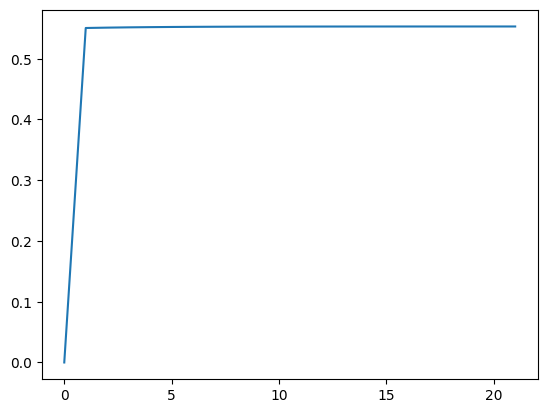

In [44]:
plt.plot(history['L'])

In [45]:
print(iteration)

21


In [46]:
print(param_1, param_2, alpha)

(-0.0981548230266496, 0.7750907562392725) (2.92877788104251, 0.9160219515700528) 0.2540451348754866


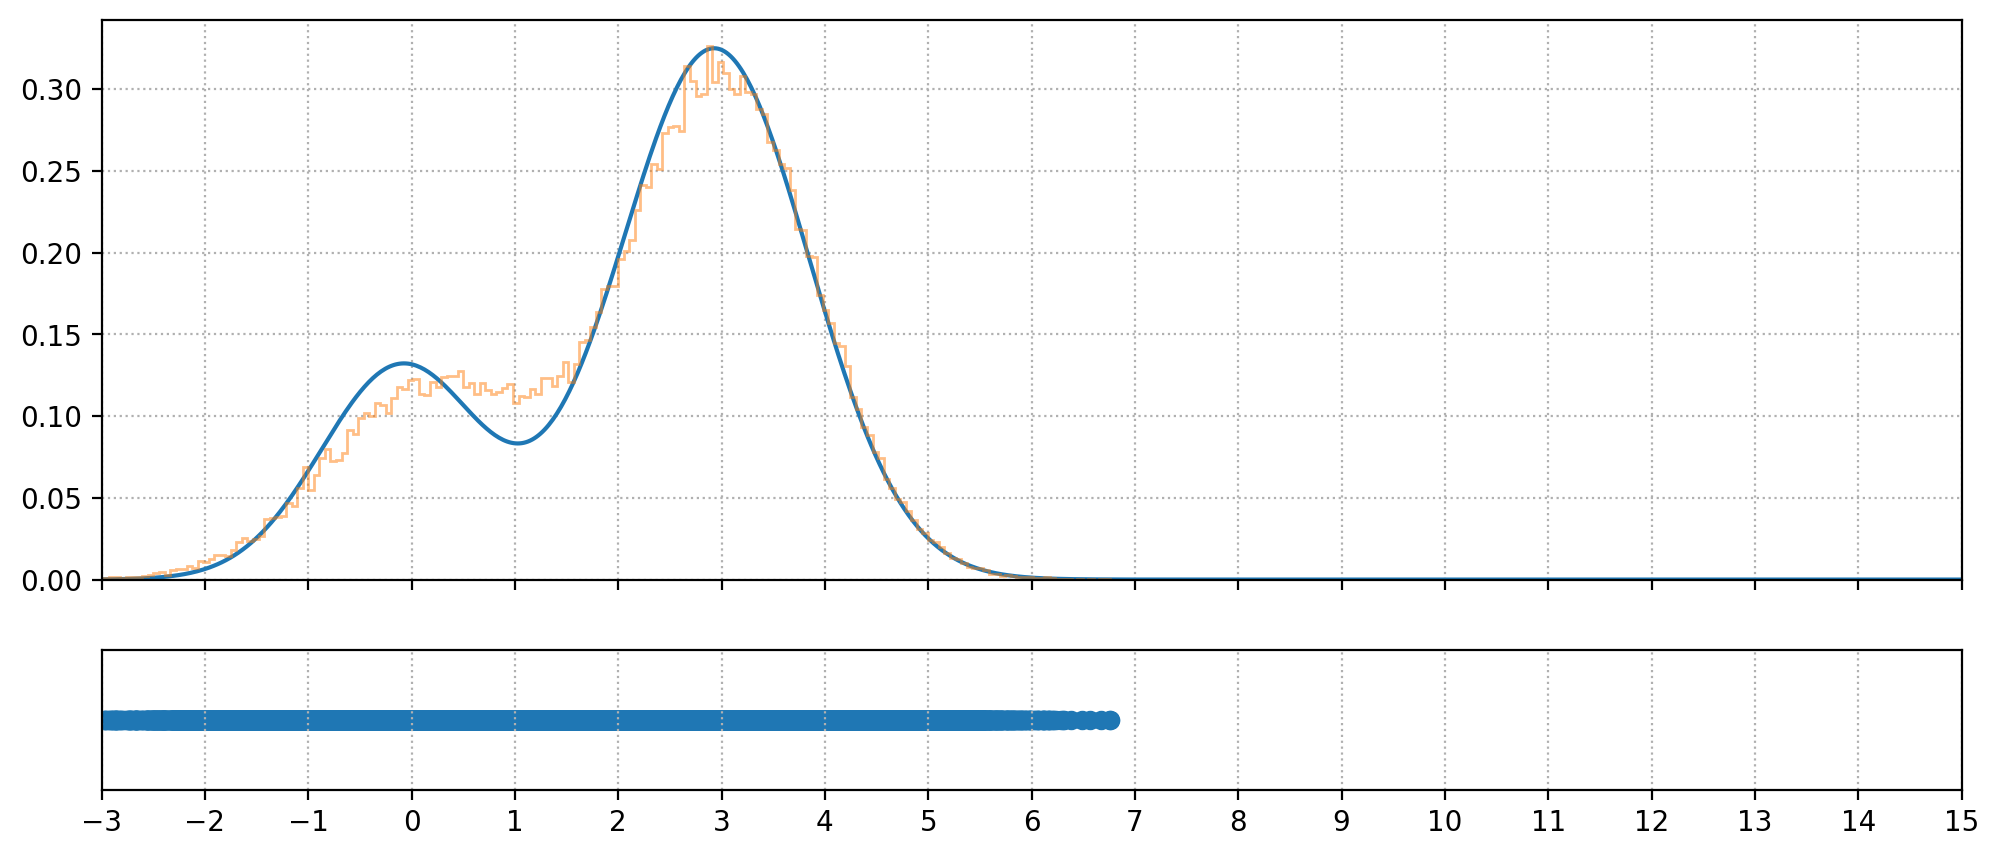

In [47]:
x_line = np.linspace(-5, 15, 1000)

fig, ax = plt.subplots(2, 1, figsize = (12, 5), dpi = 200, gridspec_kw={'height_ratios': [4, 1]}, sharex = True)

ax[0].plot(x_line, sum_of_two_gaussians(alpha, param_1[1], param_2[1], param_1[0], param_2[0]).pdf(x_line))
ax[0].hist(sample, bins = 200, histtype = 'step', alpha = 0.5, density = True)
ax[1].scatter(sample, np.zeros_like(sample))
ax[1].set_yticks([])
ax[1].set_xticks(np.arange(-5, 17, 1))
ax[1].set_xlim(-3, 15)
ax[0].grid(ls = ':')
ax[1].grid(ls = ':')

In [48]:
x_line = np.linspace(-5, 15, 1000)

fig, ax = plt.subplots(2, 1, figsize = (12, 5), dpi = 200, gridspec_kw={'height_ratios': [4, 1]}, sharex = True)
ax[0].hist(sample, bins = 200, histtype = 'step', alpha = 0.5, density = True)
distribution_line, = ax[0].plot([], []) 

def animate(i):
    distribution_line.set_data(x_line, sum_of_two_gaussians(history['alpha'][i], history['param_1'][i][1], history['param_2'][i][1], history['param_1'][i][0], history['param_2'][i][0]).pdf(x_line))
    ax[1].clear()
    ax[1].scatter(sample, np.zeros_like(sample), c = history['classes'][i])
    ax[1].set_yticks([])
    ax[1].set_xticks(np.arange(-5, 17, 1))
    ax[1].set_xlim(-3, 15)
    ax[0].grid(ls = ':')
    ax[1].grid(ls = ':')
    
    return [distribution_line]

def init():
    return animate(0)

anim = FuncAnimation(fig, animate, frames = len(history['alpha']), interval = 20, blit = True, init_func = init)
anim.save('animation_9.mp4', fps = iteration // 5, extra_args=['-vcodec', 'libx264'])